In [1]:
install.packages(c('car','xlsx'))
library(xlsx)
library(car)

Installing packages into 'C:/Users/Thosan Girisona S/Documents/R/win-library/3.1'
(as 'lib' is unspecified)


ERROR: Error in contrib.url(repos, "source"): trying to use CRAN without setting a mirror


Loading required package: rJava
Loading required package: xlsxjars


In [2]:
data <- read.xlsx(file = 'C:/Users/Thosan Girisona S/Documents/Skripsi Alfi/perempuan.xls',sheetIndex = 1)
data[1:5,]
fit <- lm(AU~AGE+BMI, data=data)
summary(fit)

,No,Nomor.CM,AGE,SEX,BB,TB,TB..cm.,BMI,AU
1,390,1480693,27,P,37,1.59,159,14.6355,4
2,210,1648931,25,P,45,1.67,167,16.13539,3.3
3,336,1625518,25,P,37.5,1.52,152,16.23096,4.8
4,395,1501694,25,P,39.5,1.54,154,16.65542,4.2
5,191,0703606,24,P,45,1.63,163,16.93703,3.1



Call:
lm(formula = AU ~ AGE + BMI, data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.05293 -0.64715 -0.06865  0.57419  2.97791 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 1.386228   0.360309   3.847 0.000148 ***
AGE         0.009441   0.006030   1.566 0.118569    
BMI         0.108197   0.015383   7.033 1.58e-11 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.9699 on 277 degrees of freedom
Multiple R-squared:  0.2006,	Adjusted R-squared:  0.1949 
F-statistic: 34.76 on 2 and 277 DF,  p-value: 3.386e-14


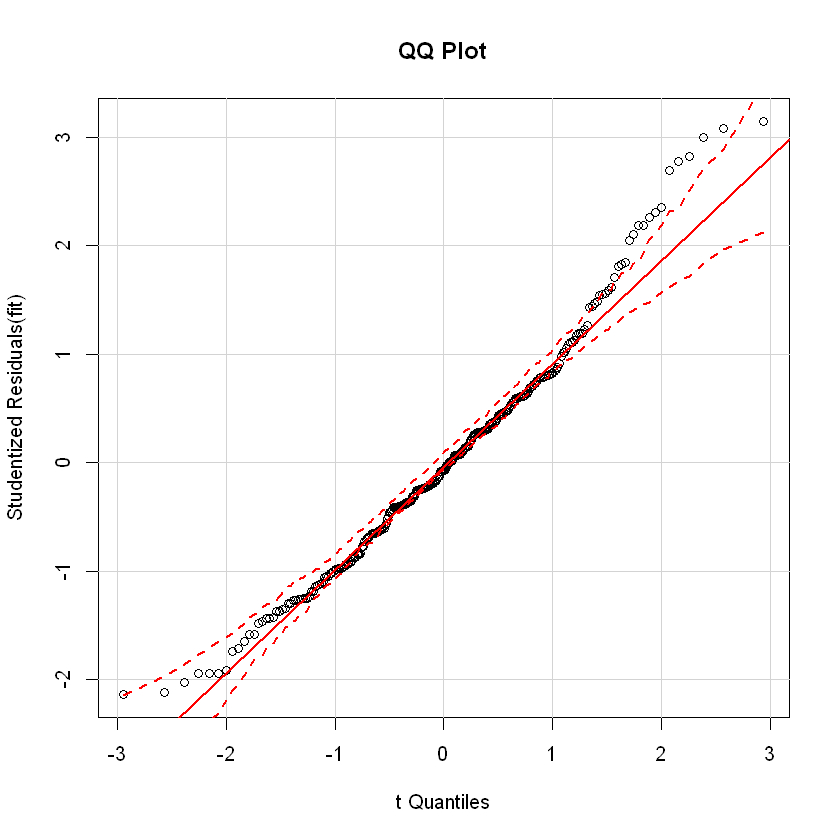

In [3]:
# Normalitas dari residual
# qq plot for studentized resid
qqPlot(fit, main="QQ Plot")
# distribution of studentized residuals
library(MASS)
sresid <- studres(fit) #karena relatif mengikuti garis lurus, maka model relatif normal
#gak pake uji saphirowilk dll karena yang diuji udah langsung model, kalo saphirowilk dll kan yang diuji 1 variabel, bukan 1 model

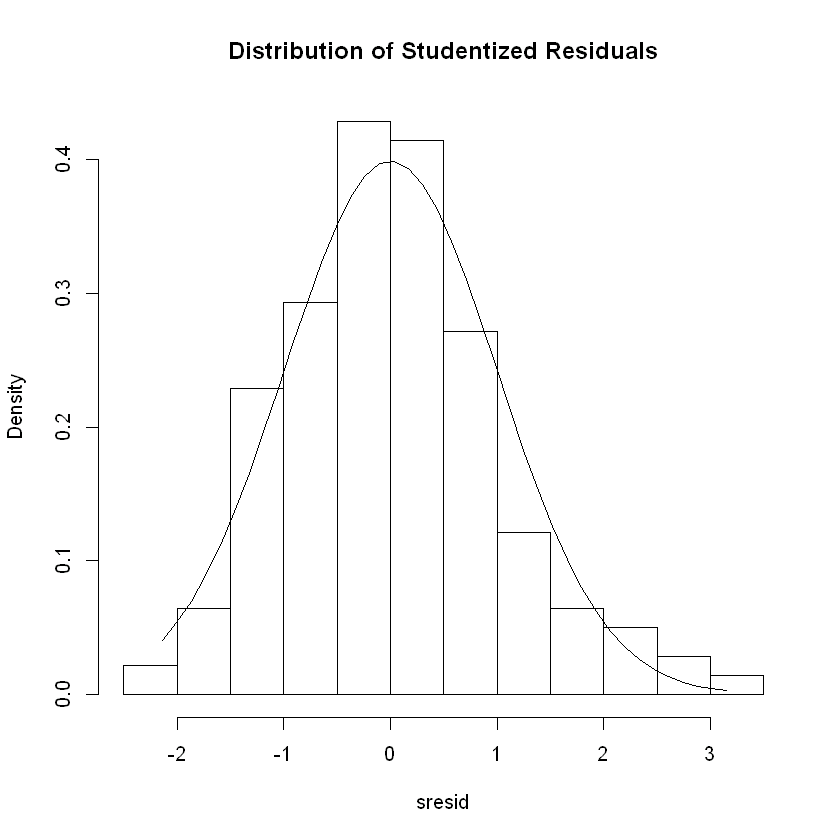

In [4]:
hist(sresid, freq=FALSE, 
     main="Distribution of Studentized Residuals")
xfit<-seq(min(sresid),max(sresid),length=40) 
yfit<-dnorm(xfit) 
lines(xfit, yfit)#plot menunjukkan relatif normal

Non-constant Variance Score Test 
Variance formula: ~ fitted.values 
Chisquare = 11.36185    Df = 1     p = 0.0007496813 


Suggested power transformation:  0.001986124 

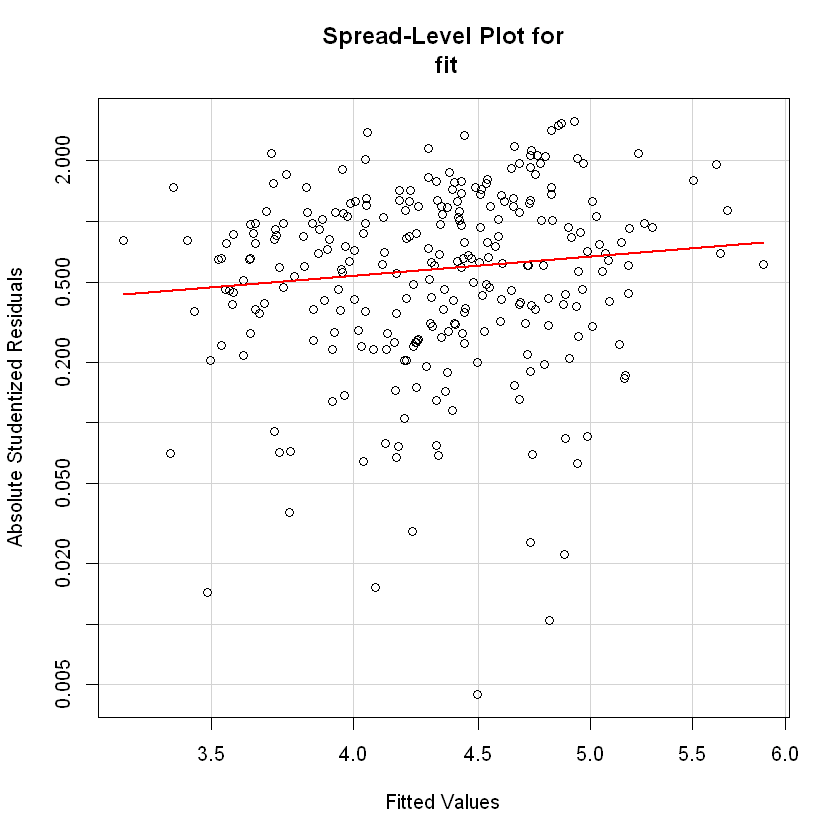

In [6]:
# Untuk mengecek Homoskedastisitas
# Homoskedastis itu artinya varian dari y-cap relatif sama terhadap seluruh nilai x
# non-constant error variance test
ncvTest(fit)
# plot studentized residuals vs. fitted values 
spreadLevelPlot(fit) #relatif Random artinya 

In [7]:
# Untuk mengecek Multikolinieritas
# Multikol itu menunjukkan adanya hubungan antara variabel2 independen di regresi
# Asumsi yang dibutuhkan untuk Regresi yang baik adalah tidak adanya multikol
vif(fit) # Variance Inflation Factors 
sqrt(vif(fit)) > 2 # kalo akarnya > 2 brarti ada multikol, BMI+AGE tidak ada multikol

AGE      BMI 
1.157808 1.157808

AGE   BMI 
FALSE FALSE

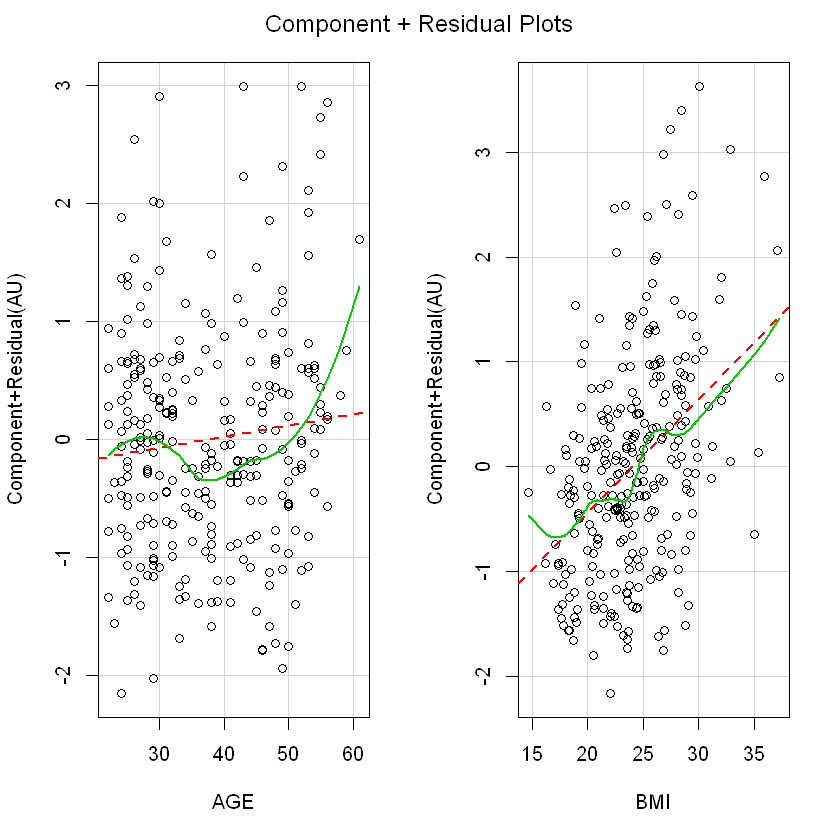

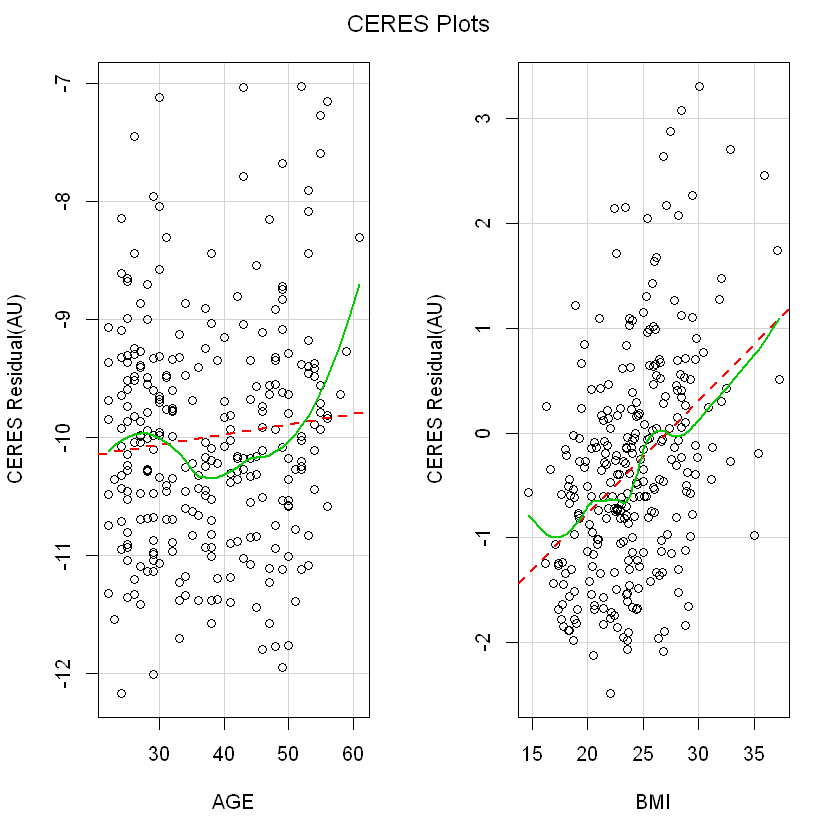

In [8]:
# Evaluate Nonlinearity
# component + residual plot 
crPlots(fit)
# Ceres plots 
ceresPlots(fit)

In [9]:
# Untuk mengecek Autokorelasi
# Autokol itu menunjukkan adanya hubungan antara antar nilai variabel dependen di time-series
# Asumsi yang dibutuhkan untuk Regresi yang baik adalah tidak adanya autokol
# Tes pake durbin-watson
durbinWatsonTest(fit) #nilai antara 0-4 , 2 berarti tidak ada autokol. 1.96 bagus,tidak ada autokol

 lag Autocorrelation D-W Statistic p-value
   1      0.01525643      1.965879     0.8
 Alternative hypothesis: rho != 0

In [10]:
#Link untuk File SPSS yang lumayan lengkap di
http://dosen.perbanas.id/wp-content/uploads/2015/05/Regresi-Linier-Berganda-SPSS1.pdf

ERROR: Error in parse(text = x, srcfile = src): <text>:2:6: unexpected '/'
1: #Link untuk File SPSS yang lumayan lengkap di
2: http:/
        ^
